## NLP Project  Duplicate_Question_Pairs


### Loading Data from Kaggle and Inital EDA

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape  # 4-lakh rows, 6 columns

(404290, 6)

In [6]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [9]:
df.loc[[0],['question1']]

,question1
0,What is the step by step guide to invest in sh...


In [10]:
df.loc[[0],['question2']]

,question2
0,What is the step by step guide to invest in sh...


In [11]:
df.question1

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286            Do you believe there is life after death?
404287                                    What is one coin?
404288    What is the approx annual cost of living while...
404289                What is like to have sex with cousin?
Name: question1, Length: 404290, dtype: object

In [12]:
df.question2

0         What is the step by step guide to invest in sh...
1         What would happen if the Indian government sto...
2         How can Internet speed be increased by hacking...
3         Find the remainder when [math]23^{24}[/math] i...
4                   Which fish would survive in salt water?
                                ...                        
404285    How many keywords are there in PERL Programmin...
404286           Is it true that there is life after death?
404287                                    What's this coin?
404288    I am having little hairfall problem but I want...
404289        What is it like to have sex with your cousin?
Name: question2, Length: 404290, dtype: object

In [13]:
df['question1']

0         What is the step by step guide to invest in sh...
1         What is the story of Kohinoor (Koh-i-Noor) Dia...
2         How can I increase the speed of my internet co...
3         Why am I mentally very lonely? How can I solve...
4         Which one dissolve in water quikly sugar, salt...
                                ...                        
404285    How many keywords are there in the Racket prog...
404286            Do you believe there is life after death?
404287                                    What is one coin?
404288    What is the approx annual cost of living while...
404289                What is like to have sex with cousin?
Name: question1, Length: 404290, dtype: object

In [14]:
df.sample(10) # 10-random-sample

,id,qid1,qid2,question1,question2,is_duplicate
250871,250871,364867,37267,Why does my iPhone suddenly die when the displ...,Why would a considerable number of iPhone 6 an...,0
359520,359520,48344,489195,How do I start learning cyber security/ networ...,How do I start in the security field to become...,1
184591,184591,281983,281984,How is Ancestry.com affiliated with the Mormon...,Does Ancestry dot com have an affiliation with...,1
145300,145300,229764,229765,What are the functional differences between ve...,What is the main difference between veins and ...,1
378971,378971,510454,510455,Who is Hindu?,Who is a Hindu?,1
303545,303545,426699,426700,What are some of the top horror zombie movie?,What are some top horror animes?,0
227228,227228,19492,45701,Why is there no option to +1 Quora posts?,Why does Quora have an option of answering one...,0
22055,22055,41446,41447,"What is the difference between Visa, PayPal, a...",Will modern payment services such as PayPal an...,0
53046,53046,93831,93832,Where can I get the best contractor for gutter...,After doing Java and ds course should I go for...,0
255534,255534,370447,370448,How can we tackle the problem of water scarcit...,How is India trying to tackle the water scarci...,1


#### Checking for null values/missing values

In [15]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [16]:
df.isna().sum() #same as above method

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [17]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
404290


<AxesSubplot:>

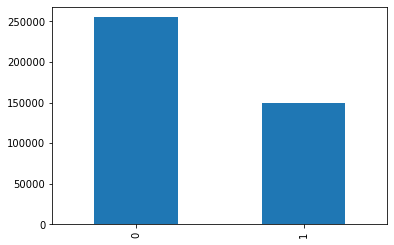

In [18]:
# no.s of duplicate(1) and non-duplicate(0) pairs
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].count())

# Percentage
df['is_duplicate'].value_counts(normalize=True)

df['is_duplicate'].value_counts().plot(kind='bar')


In [25]:
#Repeated Questions

import numpy as np
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("number of unique questions are = ", np.unique(qid).shape[0] )
x = qid.value_counts()>1
print("number of repeated questions are=",x[x].shape[0])

number of unique questions are =  537933
number of repeated questions are= 111780


5     True
4     True
6     True
1    False
2    False
3    False
7    False
dtype: bool